In [5]:
from __future__ import division
import csv
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so


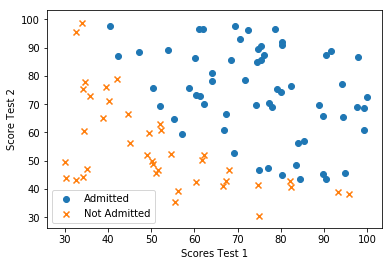

In [6]:

#Load data
df = pd.read_csv('datasets/ex2data1.csv')
X = np.array((df['Score_Test_1'].to_numpy(), df['Score_Test_2'].to_numpy()))

yes_indices = np.where((df['Admission']) == 1)[0]
no_indices = np.where((df['Admission'])== 0)[0]

df_yes = df.drop(no_indices)
df_no = df.drop(yes_indices)
assert len(df_yes) + len(df_no) == len(df)
y = np.array(df['Admission'])
number_of_samples = len(y)

# Plot data
plt.figure(1)
plt.scatter(df_yes['Score_Test_1'], df_yes['Score_Test_2'], marker = 'o', label = 'Admitted')
plt.scatter(df_no['Score_Test_1'], df_no['Score_Test_2'], marker = 'x', label = 'Not Admitted')
plt.xlabel('Scores Test 1')
plt.ylabel('Score Test 2')
plt.legend()
plt.show()

In [10]:
def sigmoid(z):

    sig = 1/(1 + np.exp(-z))
    return sig

def compute_cost(theta : np.ndarray, X : np.ndarray , y:np.ndarray) -> float:
    '''

    :param theta: np.array with Mx1 dimension
    :param X: np.array MxN dimension
    :param y: np.array with 1xN dimension
    :return: cost J_theta
    '''
    J_theta = np.mean(-y * np.log(sigmoid(theta.transpose().dot(X))) - (1-y) * np.log(1 - sigmoid(theta.transpose().dot(X))))

    return J_theta

def compute_gradients(theta : np.ndarray, X : np.ndarray , y:np.ndarray) -> np.ndarray:
    '''

        :param theta: np.array with Mx1 dimension
        :param X: np.array MxN dimension
        :param y: np.array with 1xN dimension
        :return: gradients
        '''
    gradients = (sigmoid(theta.transpose().dot(X)) - y).dot(X.transpose())/len(y)
    return gradients

def minimize_cost_and_find_theta(initial_theta: np.ndarray, X :np.ndarray, y:np.ndarray) -> tuple():
    '''
       :param initial_theta: np.array with Mx1 dimension
       :param X: np.array MxN dimension
       :param y: np.array with 1xN dimension
       :return: optimized parameters thetas
    '''

    # Advanced minimizing algorithm
    result = so.minimize(fun =compute_cost,
                         x0 =initial_theta,
                         args = (X,y),
                         jac = compute_gradients)
    '''
    fun : function to minimize, in this case it is compute_cost 
    x0 : initial value of the variable to be optimized for minimum cost 
    args : additional arguments to the compute_cost function 
    jac : function to calculate the gradient 
    '''
    return result

def plot_decision_boundary_line(theta : np.ndarray, X: np.ndarray, y:np.ndarray, fig_number : int) -> plt.figure:
    '''
        :param initial_theta: np.array with Mx1 dimension
        :param X: np.array MxN dimension
        :param y: np.array with 1xN dimension
        :param fig_number
        :return: figure object
        '''

    x_1 = np.array([min(X[1]), max(X[1])])
    x_2 = -theta[0]/theta[2] - theta[1]/theta[2]*x_1
    fig = plt.figure(fig_number)
    plt.plot(x_1, x_2, color = 'k', linewidth = 2, label = 'Decision Boundary')
    plt.legend()
    return fig

def predict_outcome_for_given_dataset(theta: np.ndarray, X : np.ndarray) -> np.ndarray:
    '''

    :param theta: np.array with Mx1 dimension
    :param X: np.array MxN dimension
    :return: prediction for the dataset
    '''
    probability = sigmoid(X.transpose().dot(theta))
    prediction = (probability > 0.5).astype(int)

    return prediction



In [8]:
# Prepare data to calculate cost function
ones = np.ones((1,number_of_samples))
X = np.vstack((ones, X))

initial_theta = np.zeros(3)
cost = compute_cost(initial_theta, X,  y)
gradients = compute_gradients(initial_theta, X, y)

print(f'Cost at initial theta : {cost}')
print(f'Gradients at initial theta: {gradients}')

# Perform optimization on cost_function to find optimized theta
result = minimize_cost_and_find_theta(initial_theta, X, y)
final_theta = result.x
print (f'Final cost at optimized thetas: {result.fun}')

print(f'Optimized thetas: {result.x}')


Cost at initial theta : 0.6931471805599453
Gradients at initial theta: [ -0.1        -12.00921659 -11.26284221]
Final cost at optimized thetas: 0.2034977015894438
Optimized thetas: [-25.16133284   0.2062317    0.2014716 ]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


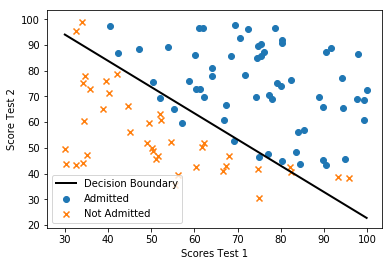

In [9]:
# Plot data
plt.figure(1)
plt.scatter(df_yes['Score_Test_1'], df_yes['Score_Test_2'], marker = 'o', label = 'Admitted')
plt.scatter(df_no['Score_Test_1'], df_no['Score_Test_2'], marker = 'x', label = 'Not Admitted')
plt.xlabel('Scores Test 1')
plt.ylabel('Score Test 2')
plt.legend()


# Plot decision boundary on the data 
plot_with_decision_boundary = plot_decision_boundary_line(final_theta, X, y, fig_number = 1)
plt.show()


In [13]:
# Predicting if a student will be admitted or not
# At first we will find the probability of a student with scores 45,85 to be admitted in the program
x = np.array([1, 45, 85])
probability_of_admission = sigmoid(x.dot(final_theta))
print(f'Probability of admission for a student with scores 45 and 85 is : {probability_of_admission}')

prediction_on_training_data_set = predict_outcome_for_given_dataset(final_theta, X)

accuracy = len(np.where((prediction_on_training_data_set == y))[0])/len(y) * 100.0
print(f'Accuracy of classification algorithm on training set is {accuracy}')

Probability of admission for a student with scores 45 and 85 is : 0.7762907240588949
Accuracy of classification algorithm on training set is 89.0
